# Problem 1

In this problem, several functions are graphed with points of interest marked.

## Initial Setup

In [0]:
from mpl_toolkits import mplot3d

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## A Function with a Minimum

$z=x^2+y^2$

The minimum, p1, is marked with a blue dot

### Define Function

In [0]:
x_range = np.linspace(-1, 1)
y_range = np.linspace(-1, 1)

def f(x, y):
    return np.square(x) + np.square(y)

X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

### 3D Plot

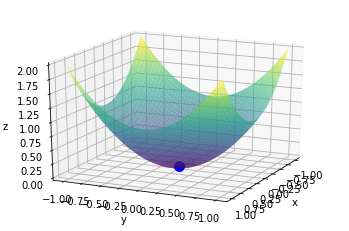

In [32]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.6)
ax.plot([0], [0], [0], marker='o', color='blue', markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 25)

### Density Plot

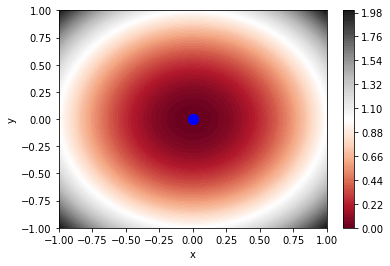

In [33]:
plt.axes()
plt.contourf(X, Y, Z, 100, cmap='RdGy')
plt.plot([0], [0], [0], marker='o', color='blue', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

### Contour Plot

Text(0, 0.5, 'y')

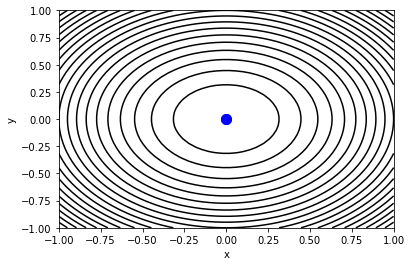

In [34]:
ax = plt.axes()
ax.contour(X, Y, Z, 20, colors='black')
ax.plot([0], [0], [0], marker='o', color='blue', markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')

## A Function with a Maximum

$z = -(\left| x + y \right| + \left| y - x \right|)$

The maximum, p2, is marked with a blue dot

### Define Function

In [0]:
x_range = np.linspace(-1, 1)
y_range = np.linspace(-1, 1)

def f(x, y):
    return np.negative(np.abs(x+y)+np.abs(y-x))

X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

### 3D Plot

Text(0.5, 0, 'z')

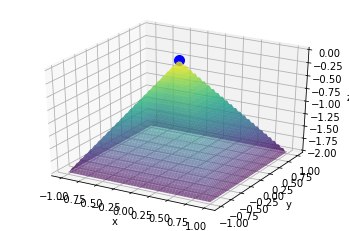

In [36]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.6)
ax.plot([0], [0], [0], marker='o', color='blue', markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Density Plot

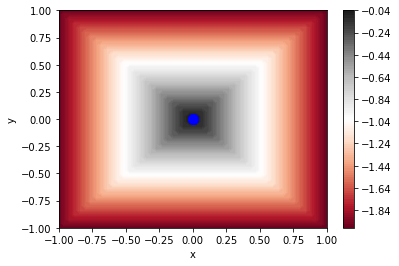

In [37]:
plt.axes()
plt.contourf(X, Y, Z, 100, cmap='RdGy')
plt.plot([0], [0], [0], marker='o', color='blue', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

### Contour Plot

Text(0, 0.5, 'y')

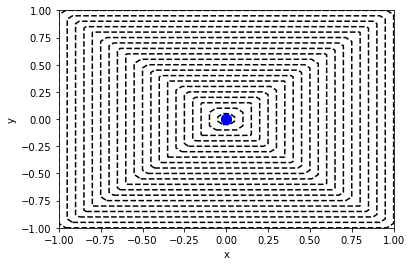

In [38]:
ax = plt.axes()
ax.contour(X, Y, Z, 20, colors='black')
ax.plot([0], [0], [0], marker='o', color='blue', markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')

## A Function with a Zero Gradient That Is Neither a Minimum nor a Maximum

$z=x^3$

The saddle point, p3, is marked with a blue dot

### Define Function

In [0]:
x_range = np.linspace(-1, 1)
y_range = np.linspace(-1, 1)

def f(x, y):
    return np.power(x, 3)

X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

### 3D Plot

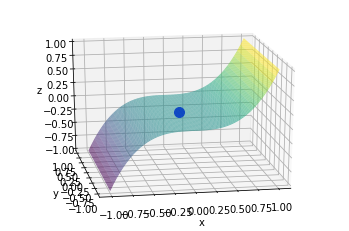

In [51]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.6)
ax.plot([0], [0], [0], marker='o', color='blue', markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, -100)

### Density Plot

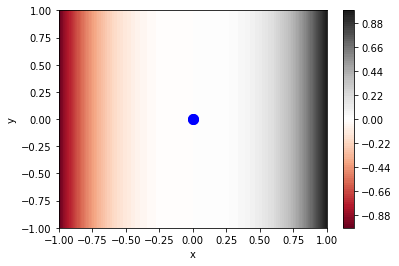

In [41]:
plt.axes()
plt.contourf(X, Y, Z, 100, cmap='RdGy')
plt.plot([0], [0], [0], marker='o', color='blue', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

### Contour Plot

Text(0, 0.5, 'y')

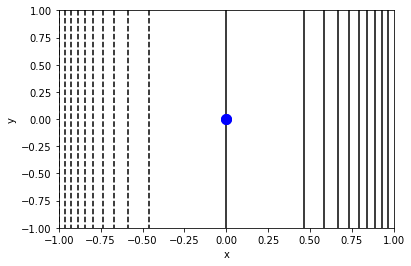

In [42]:
ax = plt.axes()
ax.contour(X, Y, Z, 20, colors='black')
ax.plot([0], [0], [0], marker='o', color='blue', markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Problem 2

In this problem, the code from [the notebook on linear regression](https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-#scrollTo=k_O5EQtmSjVS) is extended to the case when n=2.

## Initial Setup

In [54]:
# Generate m random points (x, y, z)
m = 1000
b = 4
w_1 = 3
w_2 = 2
X = 2 * np.random.rand(m, 1)
Y = 2 * np.random.rand(m, 1)
Z = b + (w_1 * X) + (w_2 * Y) + np.random.rand(m, 1)

# Number of epochs
epochs = 20

# Learning rate
lr = 0.01

# Fix initial random weight for consistent results
np.random.seed(42)
initial_weights = np.random.randn(3, 1)

# add x0 = 1
X_b = np.column_stack([np.ones((m, 1)), X, Y])

# A function to print a plane, given the weights of the general equation
def plot_plane(ax, mb, mw_1, mw_2, alpha):
    mx = np.linspace(0,2,2)
    my = np.linspace(0,2,2)

    mX, mY = np.meshgrid(mx, my)
    mZ = mb + (mw_1 * mX) + (mw_2 * mY)

    ax.plot_surface(mX, mY, mZ, color='red', alpha=alpha)

# Print sizes to validate
print(f'Weights: {initial_weights.shape}')
print(f'X: {X.shape}')
print(f'Y: {Y.shape}')
print(f'Z: {Z.shape}')
print(f'X_b: {X_b.shape}')
print(f'X_b . Weigths: {(X_b.dot(initial_weights)).shape}')
print(f'X_b^T . X_b . Weights: {(X_b.T.dot(X_b.dot(initial_weights))).shape}')

Weights: (3, 1)
X: (1000, 1)
Y: (1000, 1)
Z: (1000, 1)
X_b: (1000, 3)
X_b . Weigths: (1000, 1)
X_b^T . X_b . Weights: (3, 1)


## Display Training Data

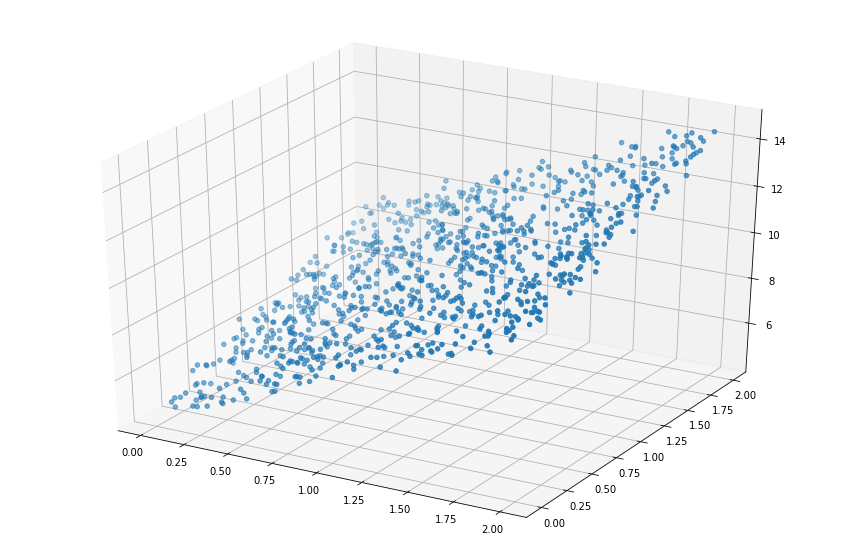

In [55]:
# Display the points
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, 'b.')

## Run Mini-Batch Gradient Descent

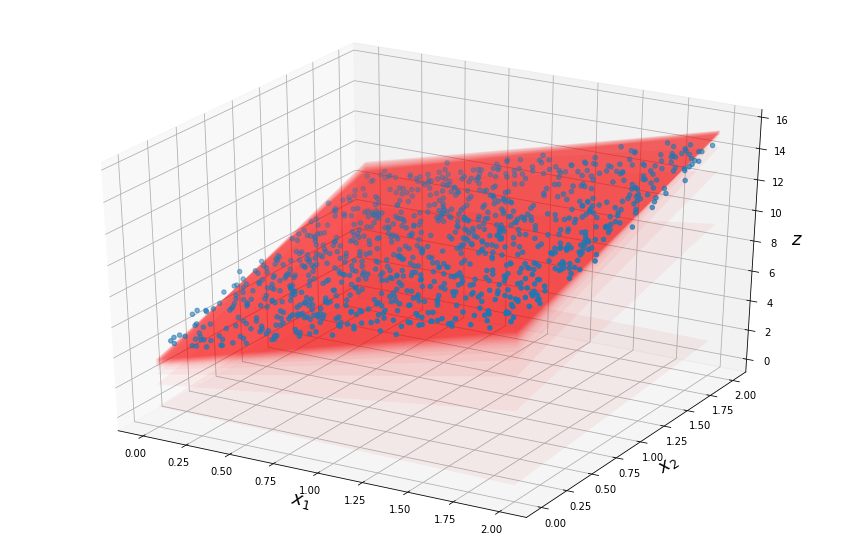

In [56]:
weights = initial_weights
batch_size = 40

# Set up plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$z$", rotation=0, fontsize=18)

# Plot training data and initial prediction
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), 'b.')
plot_plane(ax, weights[0], weights[1], weights[2], 0.05)

# Perform mini-batch gradient descent
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    Z_shuffled = Z[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = Z_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weights) - yi)
        weights = weights - lr * gradient

    # Plot the prediction after each mini-batch
    plot_plane(ax, weights[0], weights[1], weights[2], 0.05)

## Display Final Prediction

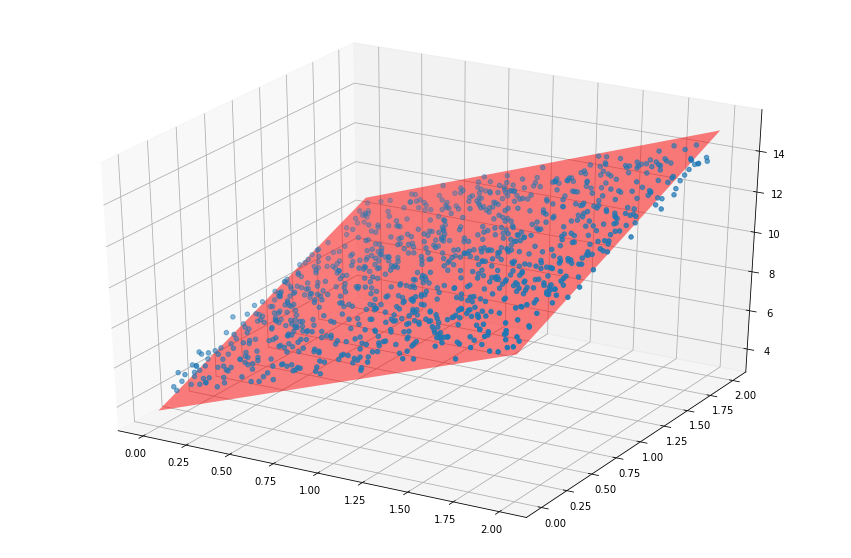

In [46]:
# Set up plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

# Plot training data
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), 'b.')

# Plot final prediction
plot_plane(ax, weights[0], weights[1], weights[2], 0.5)

# Problem 3

In this problem, MNIST digits from the Keras dataset are combined and average digits are computed and displayed.

## Initial Setup

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# Load the data set
mnist_train, mnist_test = tf.keras.datasets.mnist.load_data()
mnist_train_data, mnist_train_labels = mnist_train

# Create a holder for the total digits
total_digits = []
digits_count = []
for i in range(10):
    total_digits.append(np.zeros(mnist_train_data[0].shape))
    digits_count.append(0);

## Calculate Average Digits

In [0]:
# Add all of the digits
for i in range(len(mnist_train_data)):
    digit_label = mnist_train_labels[i]
    total_digits[digit_label] += mnist_train_data[i]
    digits_count[digit_label] += 1

# Calculate average digits
average_digits = []
for i in range(10):
    average_digits.append(total_digits[i] / digits_count[i])

## Display Results

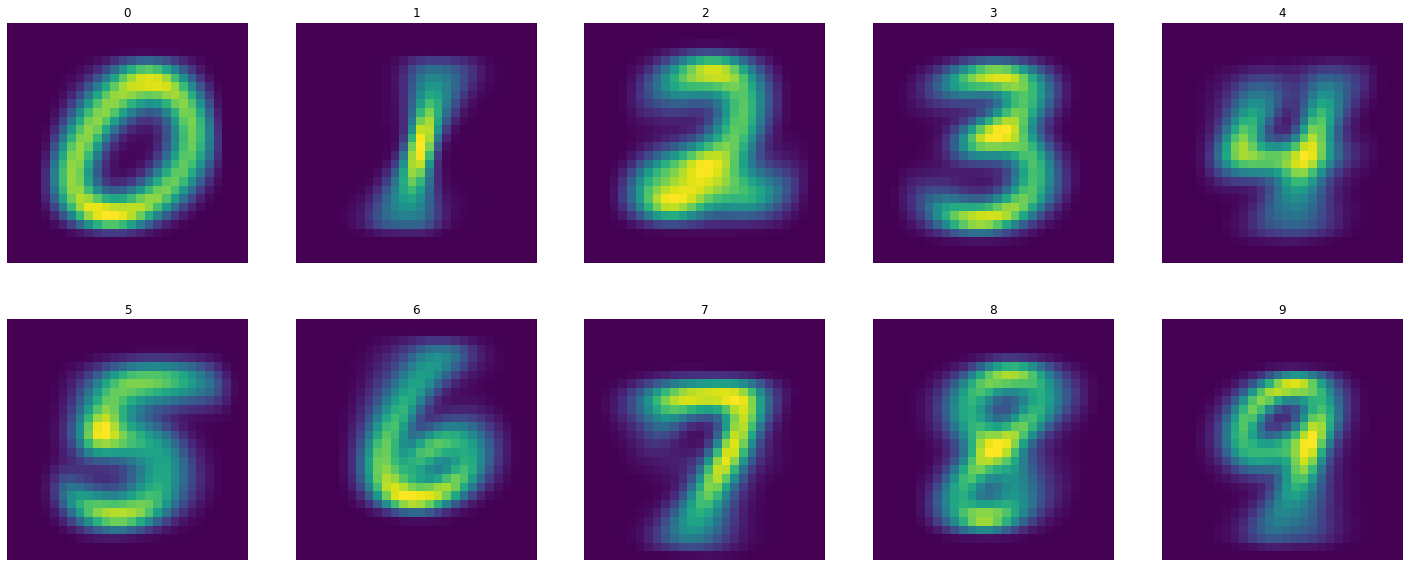

In [49]:
# Show the averaged digits
plt.figure(figsize=(25, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(average_digits[i])
    plt.title(i)
    plt.axis('off')